In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Sélection de la fonction de transfert normalisée

## Introduction

Dans le chapitre 1, on a vu quelques approximations du filtre passe-bas idéal. On sait donc maintenant choisir un type de filtre, et son ordre, selon
les spécifications données. Par exemple, si on exige que le gain dans la bande passante soit le plus constant possible, on va choisir les filtres de
Butterworth. Si on exige plutôt que la bande de transition soit la plus étroite possible pour un ordre donné, on choisira plutôt les filtres de Chebyshev. Si les spécifications exigent que la réponse de phase soit la plus linéaire possible sur une bande de fréquences données, on choisira alors les filtres de Bessel, sachant que dans ce cas la caractéristique de gain ne sera pas aussi bonne que pour les deux autres type de filtres.

Tel que vu dans le chapitre « Introduction », les étapes de conception d’un filtre analogique sont les suivantes :

1) **Détermination des spécifications du filtre à concevoir**, en particulier les tolérances de gain dans la bande passante, dans la bande atténuée et pour la bande de transition, de même que les tolérances de phase s’il y a lieu.

2) **Transformations des spécifications du filtre** à concevoir en spécifications du filtre passe-bas normalisé correspondant.

3) **Choix d’un filtre passe-bas normalisé** (ex. : Butterworth, Chebyshev, Bessel, etc.) et de l’ordre $N$ minimal requis pour répondre aux spécifications. On obtient alors sa fonction de transfert $H(s)$ par des tables ou encore par des outils de conception comme la librairie *scipy* de Python.

4) **Transformation et dénormalisation du filtre passe-bas normalisé**, en appliquant les transformations fréquentielles nécessaires sur la variable $s$ dans sa fonction de transfert. On obtient alors la fonction de transfert globale du filtre à réaliser, que l’on décompose en sous-fonctions d’ordre 2 qui seront mises en oeuvre en circuits.

5) **Synthèse du circuit analogique** (actif), en choisissant une structure de filtre et des valeurs standards de composants, permettant de réaliser la fonction de transfert produite à l’étape 4.

6) **Vérification du circuit réalisé**, mesure des performances afin de valider que le filtre rencontre les spécifications fixées à l’étape 1. Réglages finaux si nécessaires.

Nous allons maintenant nous attarder aux étapes 2 et 3, i.e. la transformations des spécifications du filtre à concevoir en spécifications du
filtre passe-bas normalisé correspondant, et le choix d’un filtre passe-bas normalisé répondant aux spécifications. L’étape 4 qui consiste à transformer et dénormaliser la fonction de transfert du passe-bas normalisé choisi a déjà été vue au chapitre 2. Le chapitre 4 présentera les structures de filtres actifs pour réaliser le filtre en circuit.

## Détermination du passe-bas normalisé

Dans le chapitre 3, on a vu quatre transformations fréquentielles pour passer
1) d’un passe-bas normalisé à un passe-bas dénormalisé
2) d’un passe-bas normalisé à un passe-haut dénormalisé
3) d’un passe-bas normalisé à un passe-bande dénormalisé
4) d’un passe-bas normalisé à un coupe-bande dénormalisé

Si la fonction de transfert du passe-bas normalisé est $H(s)$, alors on obtient les autres filtres en appliquant les changements de variables suivants

Passe-bas :
\begin{equation}
\boxed{s = \frac{s}{\omega_c}}
\label{eq:passe-bas} \tag{1}
\end{equation}

Passe-haut :
\begin{equation}
\boxed{s = \frac{\omega_c}{s}}
\label{eq:passe-haut} \tag{2}
\end{equation}

Passe-bande :
\begin{equation}
\boxed{s = \frac{s^2 + \omega_a \omega_b}{(\omega_b - \omega_a)s}}
\label{eq:passe-bande} \tag{4}
\end{equation}

où $\omega_b$ et $\omega_a$ sont les fréquences limites haute et basse de la bande de fréquenced que l'on veut laisser passer.

Coupe-bande :
\begin{equation}
\boxed{s = \frac{(\omega_b - \omega_a)s}{s^2 + \omega_a \omega_b}}
\label{eq:coupe-bande} \tag{5}
\end{equation}

où $\omega_b$ et $\omega_a$ sont les fréquences limites haute et basse de la bande de fréquences que l'on veut couper.

Nous interprétons ces transformations comme suit : la variable s initiale représente
la fréquence « normalisée » $j\omega$ du filtre passe-bas normalisé, alors que la
variable s finale représente la fréquence « dénormalisée » $j\omega$ du filtre désiré. En
posant $s = j\omega$ dans les équations précédente, on obtient :

Passe-bas :
\begin{equation}
\boxed{\overline{\omega} = \frac{\omega}{\omega_c}}
\label{eq:pbas-f} \tag{5}
\end{equation}

Passe-haut :
\begin{equation}
\boxed{\overline{\omega} = -\frac{\omega_c}{\omega}}
\label{eq:ph-f} \tag{6}
\end{equation}

Passe-bande :
\begin{equation}
\boxed{\overline{\omega} = \frac{\omega^2 + \omega_a \omega_b}{(\omega_b - \omega_a)\omega}}
\label{eq:pban-f} \tag{7}
\end{equation}

où $\omega_b$ et $\omega_a$ sont les fréquences limites haute et basse de la bande de fréquenced que l'on veut laisser passer.

Coupe-bande :
\begin{equation}
\boxed{\overline{\omega} = \frac{(\omega_b - \omega_a)\omega}{\omega^2 + \omega_a \omega_b}}
\label{eq:cb-f} \tag{8}
\end{equation}

où $\omega_b$ et $\omega_a$ sont les fréquences limites haute et basse de la bande de fréquences que l'on veut couper.

Notez que dans les équations (5) à (8), on peut remplacer les fréquences $\omega$
en radians par seconde par des fréquences $f$ en Hz, puisque l’on a des ratios
de fréquences.

Notez aussi le signe « - » dans l’équation \eqref{eq:ph-f} qui fait le lien entre la
fréquence d’un passe-haut et du passe-bas normalisé correspondant. Ce
signe « - » est dû à l’inversion fréquentielle lorsque l’on transforme un
passe-bas en passe-haut ; nous allons le négliger puisque la réponse en
fréquence d’un filtre réel est toujours symétrique : le gain à $+\omega$ est le même
que le gain à $-\omega$.

Illustrons par quelques exemples cette étape cruciale qu’est le choix d’un
passe-bas normalisé permettant de rencontrer les spécifications lorsqu’on lui
appliquera la transformation fréquentielle (étape 4) pour obtenir la fonction
de transfert requise.

### Exemple

On désire réaliser un filtre passe-bas de gain statique (gain DC) égal à 0 dB,
dont le ronflement maximal est 0.5 dB entre 0 et 1 kHz et dont l’atténuation
à 2 kHz est d’au moins 40 dB (gain d’au plus –40 dB).

Donnez la fonction de transfert du filtre passe-bas normalisé qui fera
l’affaire, si l’ordre maximal accepté pour ce filtre est N = 6.

**Solution**

On veut faire la conception d’un passe-bas, on doit donc utiliser la
transformation de l’équation \eqref{eq:pbas-f}, avec $\omega_c$ = 1 kHz. Notez que $\omega_c$ désigne
normalement la fréquence de coupure ou le gain descend sous un certains seuil (e.g. -3 dB). Cependant dans le contexte
des transformations fréquentielles $\omega_c$ est plutôt la fréquence à laquelle on
observe soit le gain, soit la phase, que l’on veut voir apparaître à 1 rad/s
pour le filtre passe-bas normalisé. Donc ici en choisissant $\omega_c$ =1 kHz, on
choisit d’observer un gain de –0.5 dB, pour le filtre passe-bas normalisé à
1 rad/s. Lors de la conception d’un passe-bande ce sont les fréquences $\omega_a$
et $\omega_b$ qui jouent ce rôle.

À $\omega$ = 1 kHz, on a
> $\overline{\omega}$ = 1 rad/sec

À $\omega$ = 2 kHz, on a
>$\overline{\omega}$ = 2 rad/sec

On veut donc déterminer la fonction de transfert d’un passe-bas normalisé
dont le gain est compris entre 0 dB et -0.5 dB pour ω entre 0 et 1 rad/sec,
et dont le gain est d’au plus –40 dB à $\omega$ = 2 rad/sec.

Puisque l’on s’intéresse surtout à la caractéristique de gain, on va choisir un
filtre de Butterworth ou de Chebyshev.

Les figures suivantes présentent le gain des filtres passe-bas normalisés de
Butterworth et de Chebyshev pour les ordres 2, 4 et 6. Pour les filtres de
Chebyshev, on a choisi le ronflement spécifié de 0.5 dB. Les filtres de
Butterworth n’ont pas de spécifications sur le ronflement.

On note que même avec un ordre 6, l’atténuation du filtre passe-bas
normalisé de Butterworth n’atteint pas 40 dB à $\omega$ = 2. Par contre, le filtre de
Chebyshev d’ordre 6 atteint –50 dB environ à $\omega$ = 2. L’ordre 4 de Chebyshev n’aurait cependant pas été suffisant, puisque son gain à $\omega$  = 2 est de –30 dB selon la figure qui suit.

Pour s’assurer que le gain du filtre rencontre les spécifications
dans la bande passante, la figure suivante fait aussi un zoom sur le module des
filtres de -5 à 1 dB. On observe bien que le ronflement ne dépasse pas la spécification de 0.5 dB.


Text(0.5, 0, 'w (rad/s)')

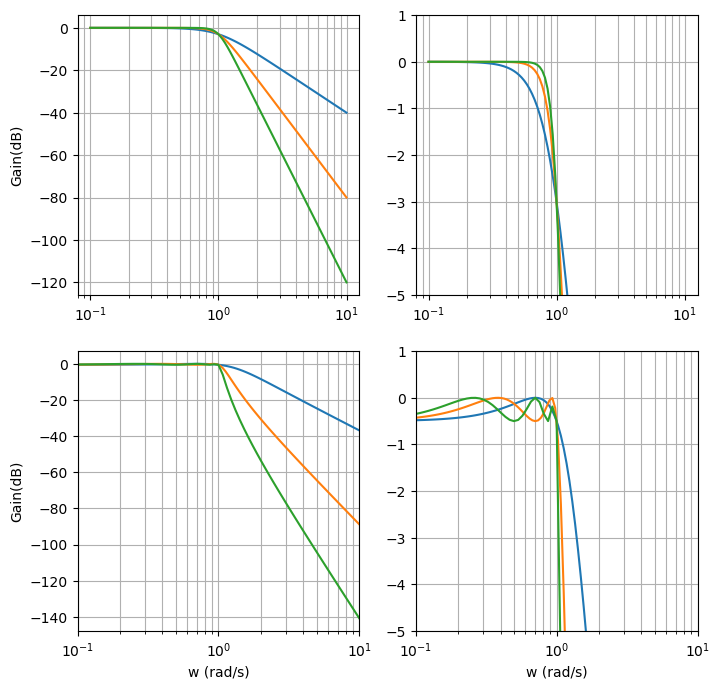

In [18]:
b1, a1 = signal.butter(2, 1, analog=True)
b2, a2 = signal.butter(4, 1, analog=True)
b3, a3 = signal.butter(6, 1, analog=True)

b4, a4 = signal.cheby1(2, 0.5, 1, analog=True)
b5, a5 = signal.cheby1(4, 0.5, 1, analog=True)
b6, a6 = signal.cheby1(6, 0.5, 1, analog=True)

w1, m1, p1 = signal.bode((b1,a1))
w2, m2, p2 = signal.bode((b2,a2))
w3, m3, p3 = signal.bode((b3,a3))

w4, m4, p4 = signal.bode((b4,a4))
w5, m5, p5 = signal.bode((b5,a5))
w6, m6, p6 = signal.bode((b6,a6))

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

ax = plt.subplot(2,2,1)
ax.semilogx(w1, m1)
ax.semilogx(w2, m2)
ax.semilogx(w3, m3)
ax.grid(which='both')
ax.set_ylabel('Gain(dB)')

ax = plt.subplot(2,2,2)
ax.semilogx(w1, m1)
ax.semilogx(w2, m2)
ax.semilogx(w3, m3)
ax.set_ylim([-5, 1])
ax.grid(which='both')

ax = plt.subplot(2,2,3)
ax.semilogx(w4, m4)
ax.semilogx(w5, m5)
ax.semilogx(w6, m6)
ax.grid(which='both')
ax.set_xlim([0.1, 10])
ax.set_xlabel('w (rad/s)')
ax.set_ylabel('Gain(dB)')

ax = plt.subplot(2,2,4)
ax.semilogx(w4, m4)
ax.semilogx(w5, m5)
ax.semilogx(w6, m6)
ax.set_xlim([0.1, 10])
ax.set_ylim([-5, 1])
ax.grid(which='both')
ax.set_xlabel('w (rad/s)')

Remarquez que l’on n’a considéré ici que des filtres d’ordre pair. Il serait
tout à fait correct de considérer aussi des filtres d’ordre impair. Un
Chebyshev d’ordre 5 faisait peut-être l’affaire ici ? Si c’est le cas, il faudrait
alors, lors de la réalisation du filtre, insérer une section de circuit d’ordre 1
en cascade avec les sections d’ordre 2.

Pour obtenir les coefficients de la fonction de transfert du filtre passe-bas
normalisé requis, on peut se référer aux tables ou encore utiliser `scipy`.
Se référer ici au chapitre 1, section « L’approximation de Chebyshev ».

Voici le code Python qui nous donne les coefficients du filtre passe-bas
normalisé choisi, i.e. le filtre Chebyshev d’ordre 6, avec un ronflement de
0.5 dB :

```python
b, a = signal.cheby1(6, 0.5, 1, analog=True)
```

```
b = [0.08946172]
a = [1.         1.15917611 2.17184462 1.5897635  1.17186133 0.43236692  0.09476266]
```


$$
H(s) = \frac{0.08946}{s^6 + 1.159 s^5 + 2.172 s^4 + 1.59 s^3 + 1.172 s^2 + 0.4324 s + 0.0948}
$$

C’est la fonction de transfert du filtre passe-bas normalisé désiré.

Il ne resterait maintenant qu’à appliquer la transformation fréquentielle de
l’équation \eqref{eq:passe-bas} (avec $w_c = 2\pi 1000$), à décomposer la fonction de transfert
obtenue en sous-fonctions d’ordre 2 et à matérialiser ce filtre en circuit actif
(chapitre 4).

## Conception assistée par ordinateur

Notez que plusieurs outils de conception, incluant MATLAB et Python, ont toutes les librairies nécessaires pour obtenir les fonctions de transfert d’ordre $N$ d’un filtre passe-bas, passe-haut, passebande
et coupe-bande. On pourra donc, en s’assurant de bien maîtriser les
chapitres 1 à 4 du présent document, vérifier ses résultats. En particulier, on
peut retrouver facilement les coefficients des tables du chapitre 2 en
spécifiant une bande passante de 1 rad/sec.

**Soyez toujours vigilants lorsque vous utilisez un outil logiciel** :
celui-ci ne peut pas totalement remplacer votre expertise et votre
connaissance du problème à résoudre. Demeurez toujours critique par
rapport au résultat d’une simulation logicielle ou d’un calcul
« automatique ». 

De plus, afin d'exploiter le plein potentiel de tels outils, c'est essentiel de comprendre comment ceux-ci fonctionnent *sous le capôt*, c'est-à-dire comment les fonction sont implémentés et quels outils mathématiques sont exploités. Ainsi, il est plus facile de comprendre un résultat aberrant, et de développer plus rapidement des solution innovantes.

Les fonctions principales de `scipy` servant à la conception de filtres analogiques sont:

- [`scipy.signal.butter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)
- [`scipy.signal.cheby1`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html)
- [`scipy.signal.bessel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html)
- [`scipy.signal.freqs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqs.html)
- [`scipy.signal.bode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html)